In [1]:
from sklearn.datasets import load_wine

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import numpy as np

## Dataset: Wine

In [5]:
wine = load_wine(as_frame=True)

In [6]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

The dataset contains 178 samples of wine, each with 13 features (each a chemical property)

In [7]:
wine.data.shape

(178, 13)

There are three different wine in the dataset.

In [8]:
set(wine.target)

{0, 1, 2}

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Simplify dataset to binary classification

To get started, let us simplify the dataset to contain only 2 classes, not 3. We simply discard wine_2.

In [10]:
x_binary = wine.data[wine.target < 2]  # ignore wine 2
x_binary

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0


In [11]:
y_binary = wine.target[wine.target < 2]
y_binary

0      0
1      0
2      0
3      0
4      0
      ..
125    1
126    1
127    1
128    1
129    1
Name: target, Length: 130, dtype: int64

## Preprocess data to ensure convergence

In [12]:
scaler = StandardScaler()
scaler.fit(x_binary)

StandardScaler()

In [13]:
# transform X into its z-scores (zero mean, and standard deviation of 1)
x_binary_norm = scaler.transform(x_binary)
x_binary_norm

array([[ 1.452455  , -0.29441432,  0.30247764, ..., -0.11242761,
         2.04002469,  0.782868  ],
       [ 0.28906609, -0.21455828, -0.67719651, ..., -0.05291788,
         0.94143735,  0.74015178],
       [ 0.24388594,  0.4471061 ,  1.11324246, ..., -0.17193734,
         0.45552372,  1.12459784],
       ...,
       [-1.30353427,  0.18472195,  1.484843  , ..., -0.52899571,
        -1.0867239 , -0.92293343],
       [-0.64842207, -0.38567837, -0.13668663, ..., -1.00507355,
        -0.36841679, -1.27605426],
       [-1.02115832,  2.66025935,  0.13356831, ..., -1.60017084,
        -0.81207706, -0.59829008]])

## Train binary classifier

In [34]:
bin_classifier = LogisticRegression(random_state=0).fit(x_binary_norm, y_binary)

## Using the classifier for prediction

In [15]:
bin_classifier.predict(x_binary_norm)
# >>> clf.predict(X[:2, :])
# array([0, 0])
# >>> clf.predict_proba(X[:2, :])
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# >>> clf.score(X, y)
# 0.97...

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
bin_classifier.score(x_binary_norm, y_binary)

1.0

## Which features does the model take into account the most?

In [17]:
bin_classifier.coef_.shape

(1, 13)

In [18]:
for coef, feat in zip(np.exp(bin_classifier.coef_[0]), wine.feature_names):
    print(f"{coef:.5f} {feat}")

0.21404 alcohol
0.61018 malic_acid
0.37851 ash
3.45508 alcalinity_of_ash
0.78857 magnesium
0.96703 total_phenols
0.71856 flavanoids
1.19135 nonflavanoid_phenols
1.20535 proanthocyanins
0.45094 color_intensity
1.16339 hue
0.53400 od280/od315_of_diluted_wines
0.16310 proline


## Multi-class logistic regression

In [19]:
# dataset
x, y = wine.data, wine.target
x.shape, y.shape

((178, 13), (178,))

In [20]:
# scale data
multi_scaler = StandardScaler().fit(x)
x_norm = multi_scaler.transform(x)

In [21]:
multi_classifier = LogisticRegression(multi_class='ovr'  # ovr: one-vs-rest
                                     ).fit(x_norm, y)

In [22]:
multi_classifier.predict(x_norm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [31]:
# for prob_0, prob_1, prob_2 in multi_classifier.predict_proba(x_norm):
#     print(f'{prob_0:.3f}  {prob_1:.3f}  {prob_2:.3f}')

In [24]:
multi_classifier.score(x_norm, y)

1.0

## Multiclass logistic regression: Multinomial vs one-vs-rest

Multinomial: https://en.wikipedia.org/wiki/Multinomial_logistic_regression
TODO

## Binary logistic regression with Keras

In [25]:
from tensorflow import keras

In [26]:
from matplotlib import pyplot as plt


In [27]:
num_features = 13
model_binary = keras.Sequential()
model_binary.add(keras.layers.Dense(1, input_shape=(num_features,), activation='sigmoid'))

In [43]:
from tensorflow.keras.optimizers import SGD

In [45]:
# SGD?

In [46]:
# Without normalization: Tough
model_binary.compile(optimizer=SGD(learning_rate=0.001, momentum=0.0, nesterov=False), loss='binary_crossentropy', metrics=['binary_accuracy'])
history_binary = model_binary.fit(
  x=x_binary,
  y=y_binary,
  shuffle=True,
  epochs=100,
  batch_size=8,
  verbose=0
)

In [49]:
# With normalized data: better!
model_binary.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history_binary_norm = model_binary.fit(
  x=x_binary_norm,
  y=y_binary,
  shuffle=True,
  epochs=100,
  batch_size=8,
    verbose=0
)

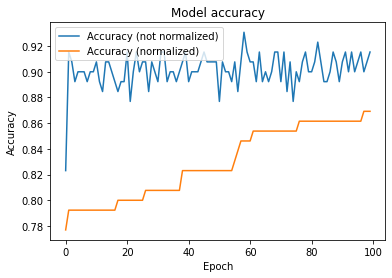

In [50]:
plt.plot(history_binary.history['binary_accuracy'], label='Accuracy (not normalized)')
plt.plot(history_binary_norm.history['binary_accuracy'], label='Accuracy (normalized)')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()